In [111]:
import skimage
import scipy
import matplotlib.pyplot as plt
from skimage import data
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 12)
plt.rcParams['image.cmap'] = 'gray'

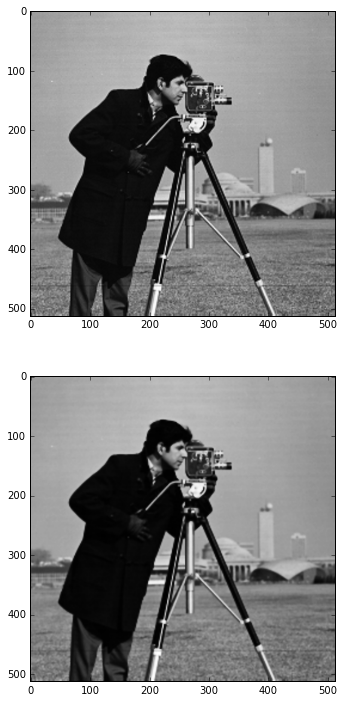

In [12]:
camera = data.camera()
plt.subplot(2,1,1)
plt.imshow(camera, cmap=plt.cm.gray)

from skimage import restoration
filtered_camera = restoration.denoise_bilateral(camera, multichannel=False)
plt.subplot(2,1,2)
plt.imshow(filtered_camera, cmap=plt.cm.gray)

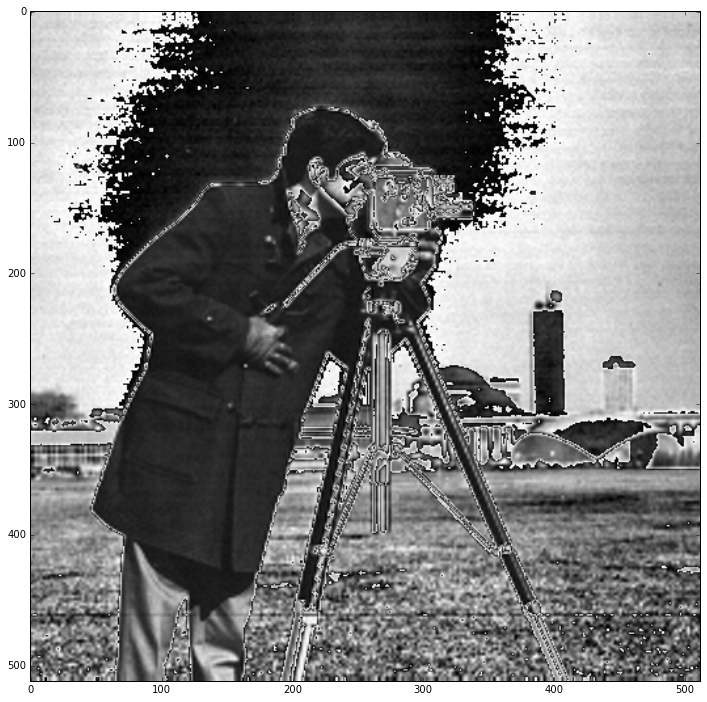

In [16]:
#pixel overflow
plt.imshow(camera*3, cmap=plt.cm.gray)

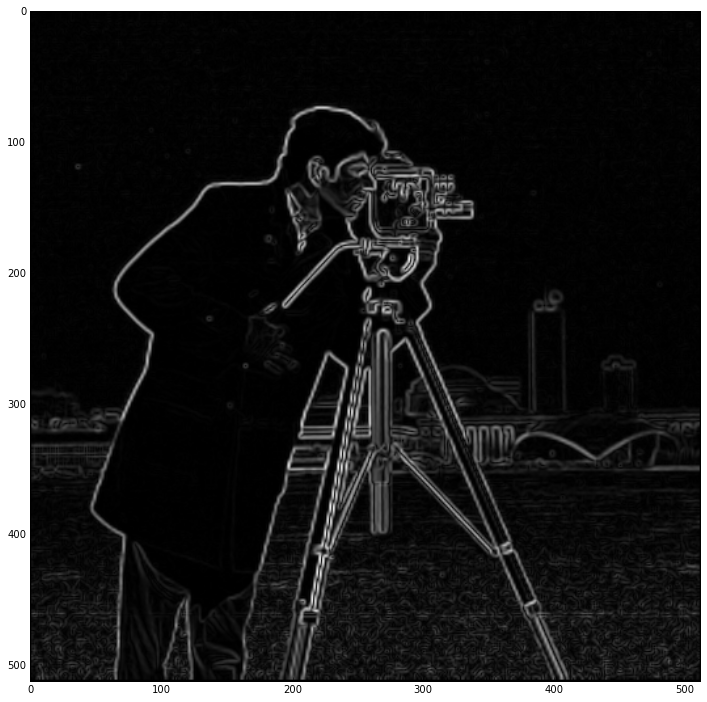

In [20]:
from skimage import filters
#edge detection
camera_sobel = filters.sobel(camera)
plt.imshow(camera_sobel, cmap=plt.cm.gray)

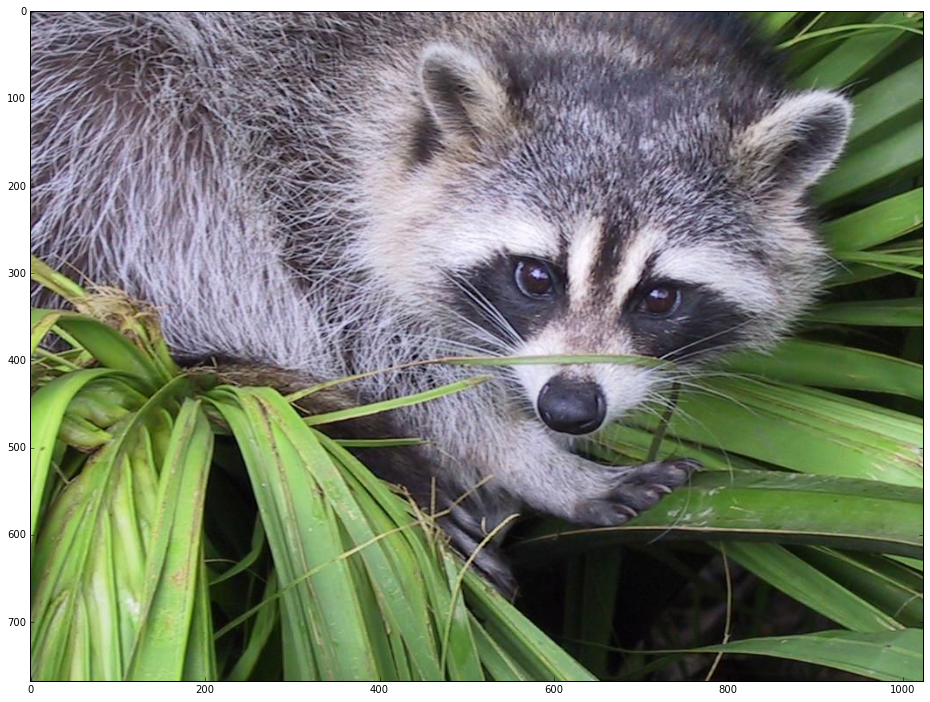

In [23]:
face = scipy.misc.face()
plt.imshow(face)

In [41]:
#histogram
from skimage import exposure, img_as_float
float_face = img_as_float(face)
exposure.histogram(float_face[:,:,1], nbins=20)

(array([15576, 36680, 32486, 31411, 34393, 46351, 49546, 52957, 62986,
        58513, 64155, 62770, 53563, 50546, 41156, 37526, 32079, 16112,
         6403,  1223]),
 array([ 0.02470588,  0.07411765,  0.12352941,  0.17294118,  0.22235294,
         0.27176471,  0.32117647,  0.37058824,  0.42      ,  0.46941176,
         0.51882353,  0.56823529,  0.61764706,  0.66705882,  0.71647059,
         0.76588235,  0.81529412,  0.86470588,  0.91411765,  0.96352941]))

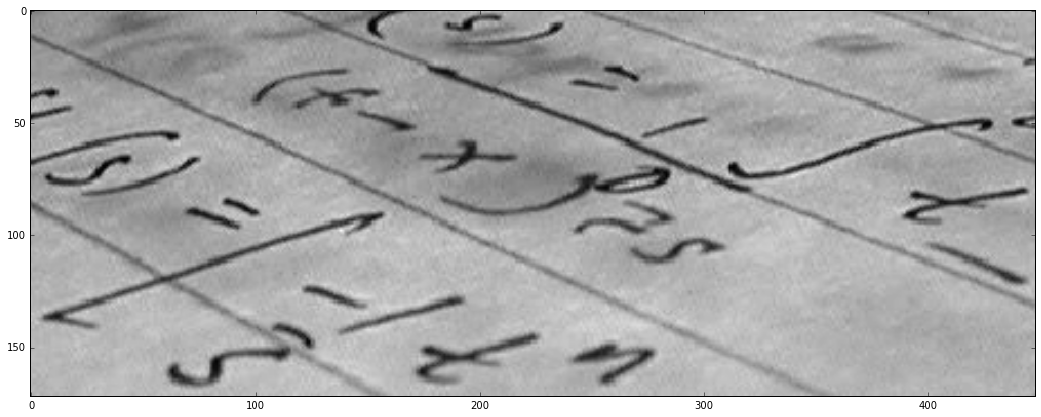

In [45]:
text = data.text()
plt.imshow(text, cmap=plt.cm.gray)

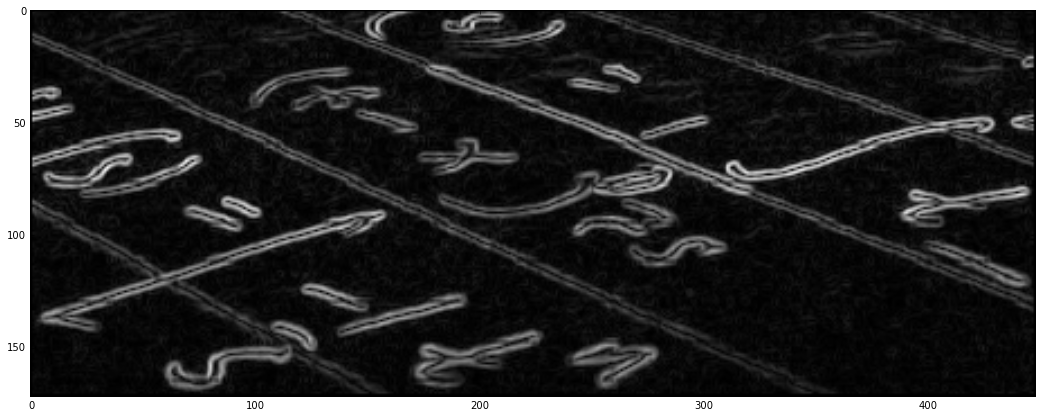

In [48]:
sobel_text = filters.sobel(text)
plt.imshow(sobel_text, cmap=plt.cm.gray)

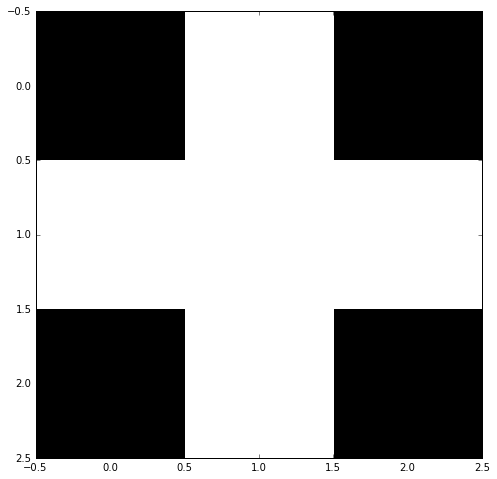

In [56]:
from skimage import morphology
morphology.diamond(1)
fig = plt.figure(figsize=(8,8))
plt.imshow(morphology.diamond(1), interpolation='nearest', cmap=plt.cm.gray)

In [63]:
a = np.zeros((7,7) ,dtype=np.int)
a[1:6, 2:5] = 1
print a

[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]


In [66]:
#erosion
morphology.binary_erosion(a, morphology.diamond(1)).astype(np.int)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [67]:
#dilation
morphology.binary_dilation(a, morphology.diamond(1)).astype(np.int)

array([[0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0]])

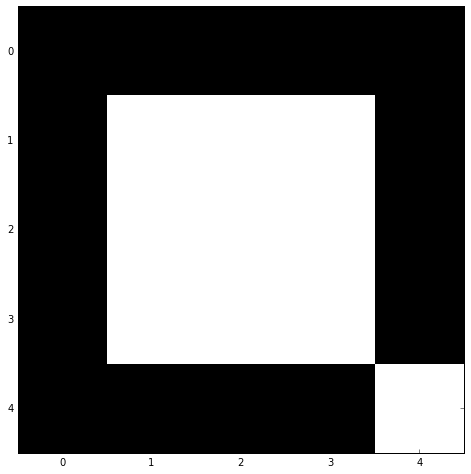

In [72]:
#opening = erosion + dilation
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1
fig = plt.figure(figsize=(8,8))
plt.imshow(a, cmap=plt.cm.gray, interpolation='nearest')

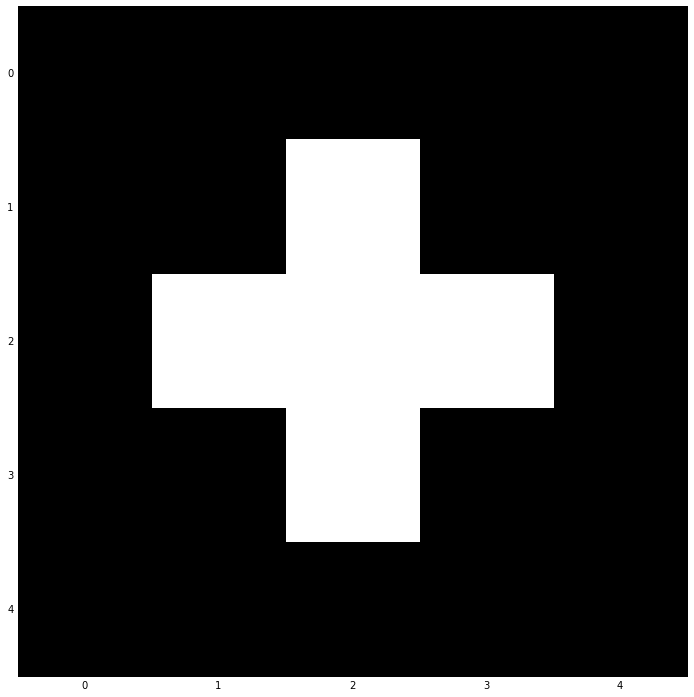

In [73]:
a = morphology.binary_opening(a, morphology.diamond(1)).astype(np.int)
plt.imshow(a, cmap=plt.cm.gray, interpolation='nearest')

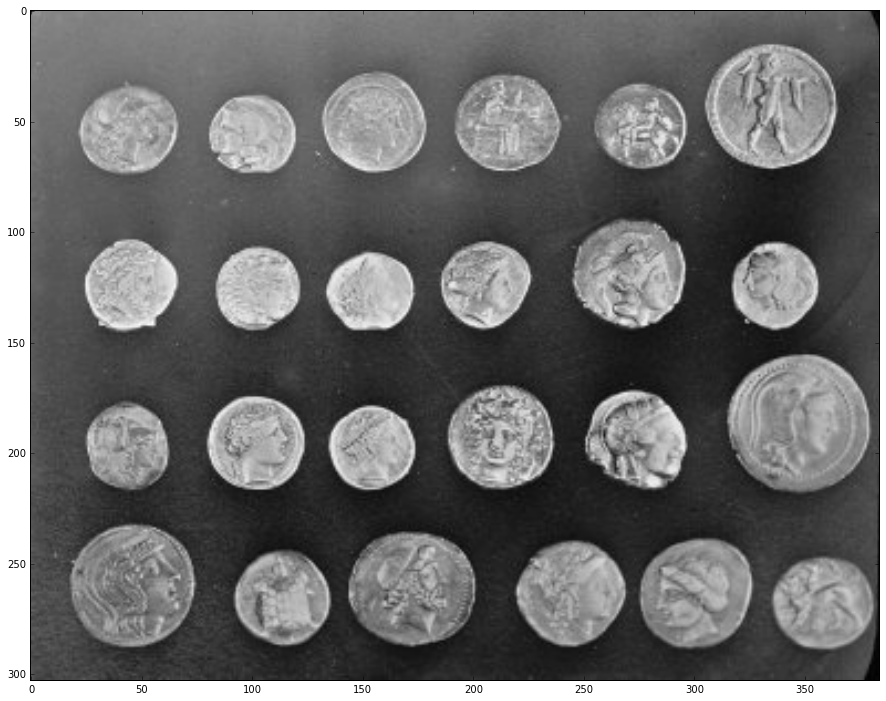

In [76]:
from skimage.morphology import disk
coins = data.coins()
plt.imshow(coins, cmap=plt.cm.gray)

## Image segmentation
### ex. different labels to different regions of the image, extract pixels of an object of interest
[Otsu method](https://en.wikipedia.org/wiki/Otsu%27s_method)

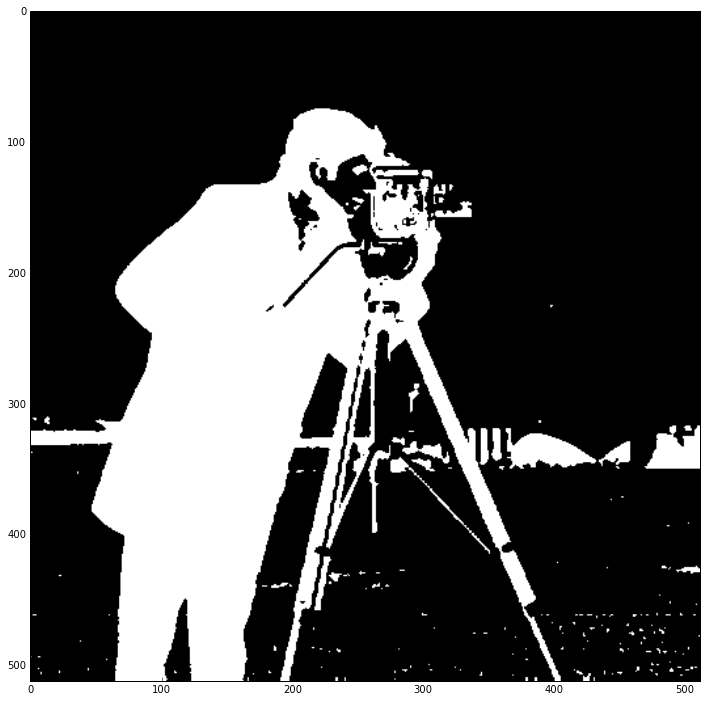

In [82]:
val = filters.threshold_otsu(camera)
mask = camera < val
plt.imshow(mask.astype(np.int), cmap=plt.cm.gray)

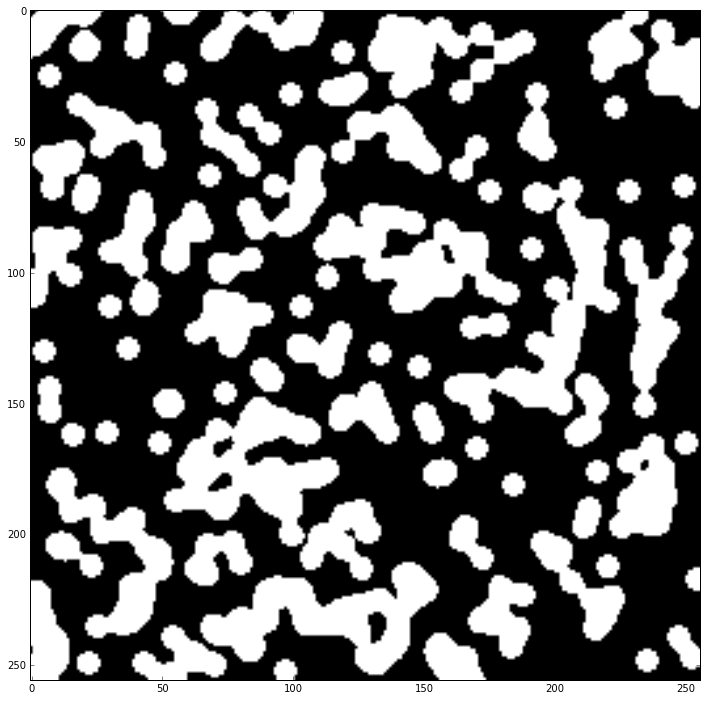

In [89]:
n = 20
l = 256
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma=l / (4. * n))
blobs = im>im.mean()
plt.imshow(blobs, cmap=plt.cm.gray)

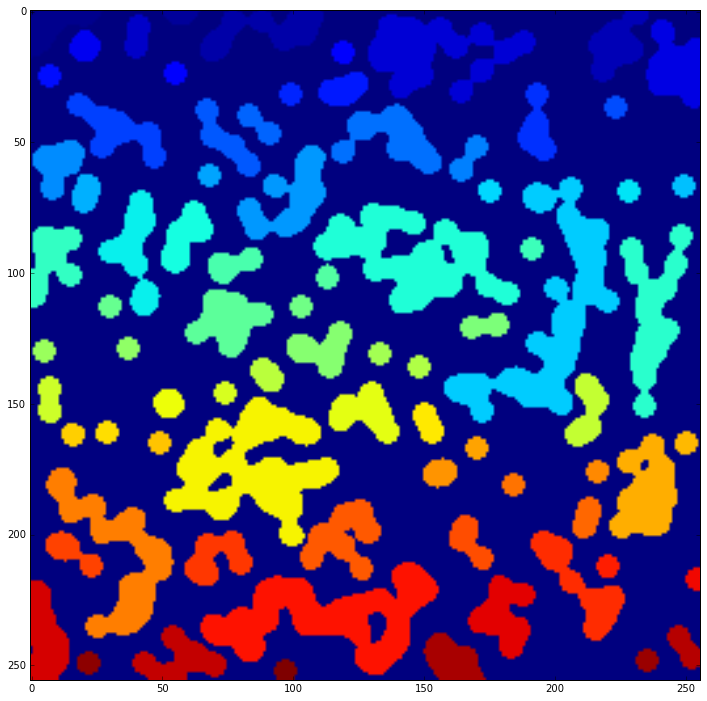

In [96]:
#connect different components in the foreground
from skimage import measure
all_labels = measure.label(blobs, background=0)
plt.imshow(all_labels)

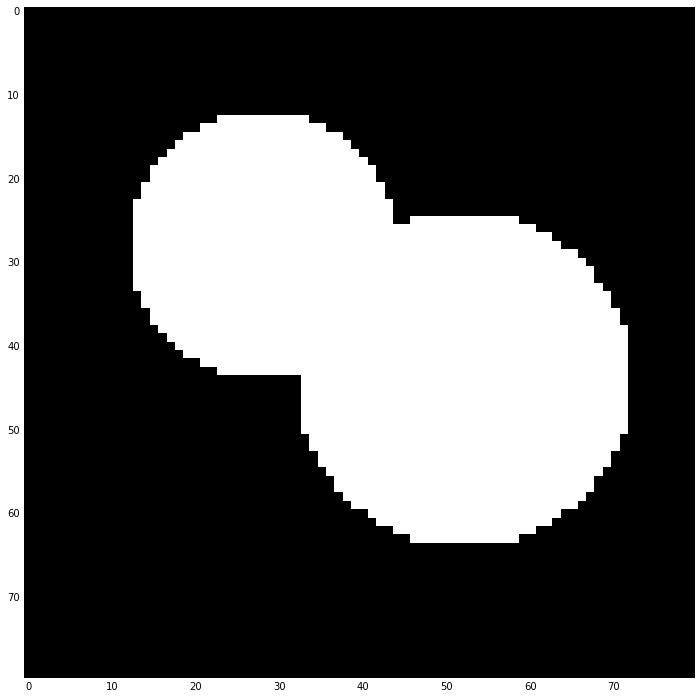

In [98]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max

# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')

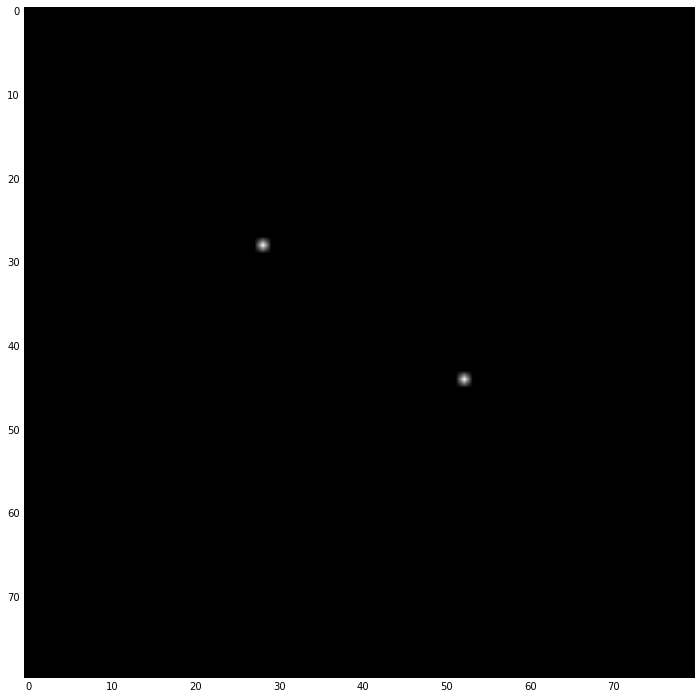

In [112]:
from scipy import ndimage
distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3,3)), labels=image)
plt.imshow(local_maxi)

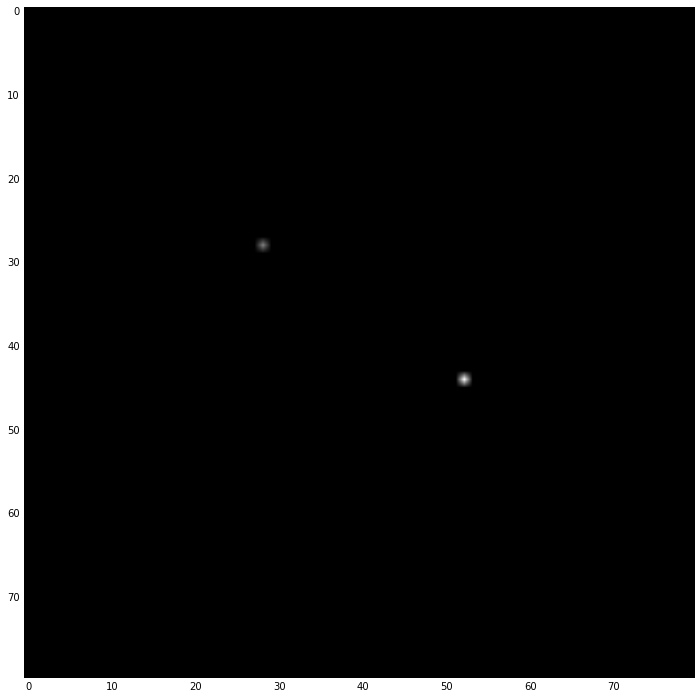

In [114]:
markers = morphology.label(local_maxi)
plt.imshow(markers)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

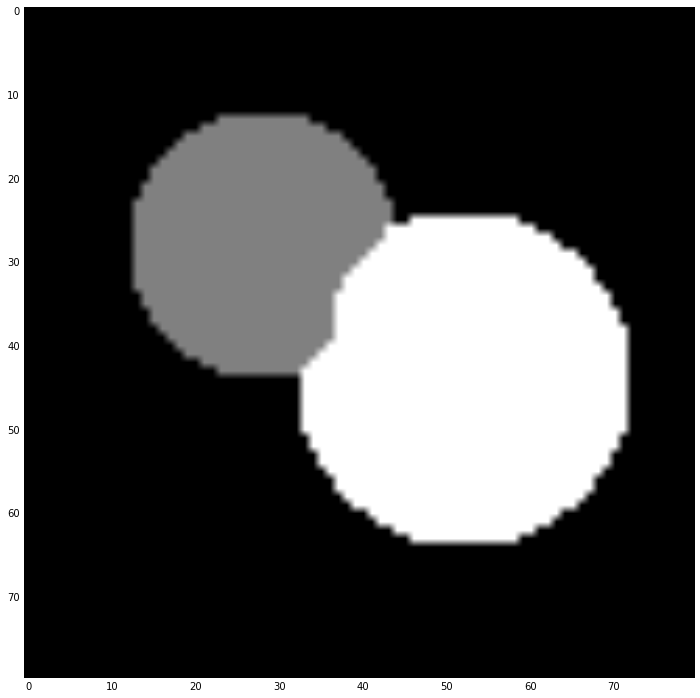

In [116]:
labels_ws = watershed(-distance, markers, mask=image)
plt.imshow(labels_ws)

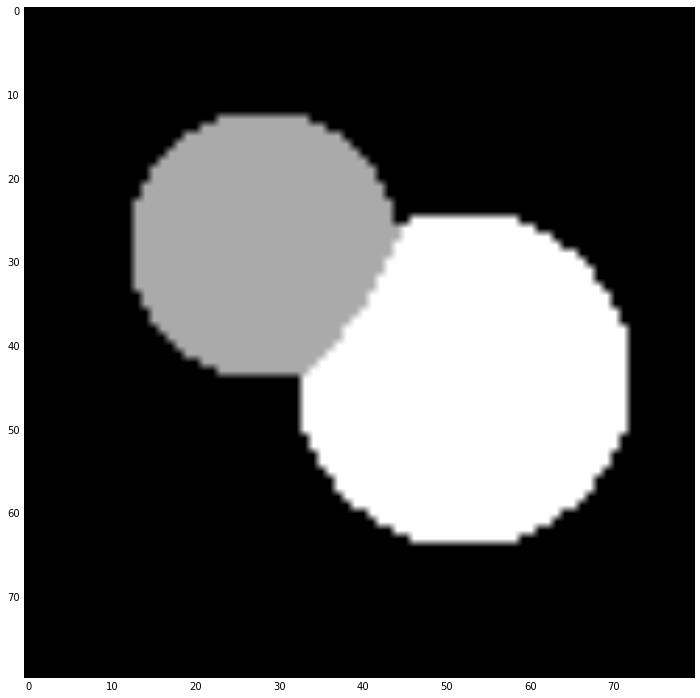

In [133]:
#random walker segmentation
from skimage import segmentation
markers[~image] = -1
labels_rw =  segmentation.random_walker(image, markers)
plt.imshow(labels_rw)

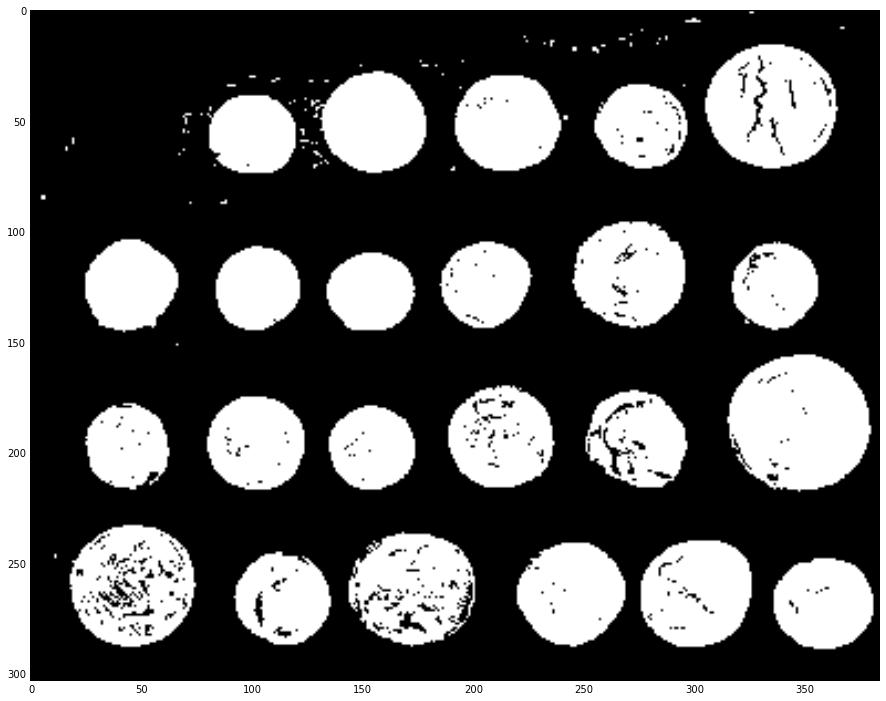

In [136]:
mask = coins > filters.threshold_otsu(coins)
clean_border = segmentation.clear_border(mask)
plt.imshow(clean_border)

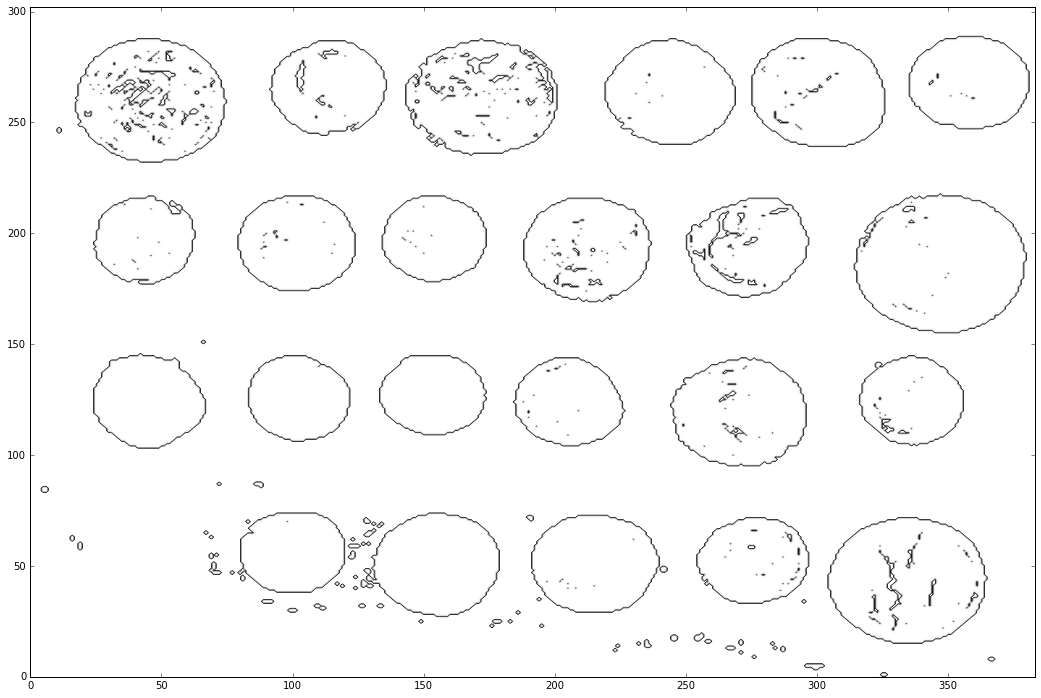

In [137]:
plt.contour(clean_border)